# Assignment 3: Classical Hough Transform

## Ex. 3.1 Detect lanes and eyes

* there are two datasets available: "images/eye_tracking" and "images/lane_detection" - decide for one of them
* implement the classical Hough Transform for lines (for lane detection) **OR** circles (eye tracking) as shown in the lecture
* use a Canny edge detector to produce edge images for the sequence of images

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np
from scipy import ndimage as ndi
import math

#We use lane detection in this exercise

lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00050.png')
lane3 = io.imread('images/lane_detection/f00090.png')

eye1 = io.imread('images/eye_tracking/0000.jpeg')
eye2 = io.imread('images/eye_tracking/0050.jpeg')
eye3 = io.imread('images/eye_tracking/0090.jpeg')


# produce edge images for lane images
img1 = color.rgb2gray(lane1)
lane_edges1 = feature.canny(img1)

img2 = color.rgb2gray(lane2)
lane_edges2 = feature.canny(img2)

img3 = color.rgb2gray(lane3)
lane_edges3 = feature.canny(img3)

io.imshow(lane_edges1)
io.imshow(lane_edges2)
io.imshow(lane_edges3)

def hough_line(img, angle_step = 1, lines_are_white = True, value_threshold = 0.4):
    
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_step))
    width, height = img.shape
    diag_len = int(round(math.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint8)
    y_idxs, x_idxs = np.nonzero(img) 
    
    are_edges = img > value_threshold if lines_are_white else img < value_threshold
    
    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        
        for t_idx in range(num_thetas):
            rho = diag_len + int(round(x * cos_t[t_idx] + y * sin_t[t_idx]))
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos

accumulator, thetas, rhos = hough_line(lane_edges2)


idx = np.argmax(accumulator)
rho = rhos[idx // accumulator.shape[1]]
theta = thetas[idx % accumulator.shape[1]]
print(idx,rho, np.rad2deg(theta))

#idx = np.argmax(accumulator)
#rho = rhos[idx / accumulator.shape[1]]
#theta = thetas[idx % accumulator.shape[1]]

io.imshow(accumulator)

fig = plt.figure(figsize=(15, 10))
ax11 = plt.subplot(2, 3, 1)
ax12 = plt.subplot(2, 3, 2)
ax13 = plt.subplot(2, 3, 3)

"""
ax21 = plt.subplot(2, 3, 4)
ax22 = plt.subplot(2, 3, 5)
ax23 = plt.subplot(2, 3, 6)
"""

ax11.imshow(lane_edges1)
ax12.imshow(lane_edges2)
ax13.imshow(lane_edges3)


"""
ax21.imshow(eye1)
ax22.imshow(eye2)
ax23.imshow(eye3)
"""



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


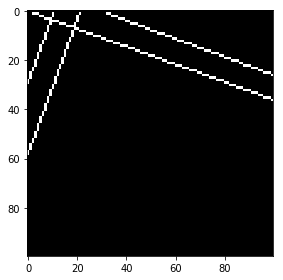

In [1]:
# dieser Code wurde als Musterlösung von Sebastian Oltmanns zur Verfügung gestellt und von Tim renoviert

%matplotlib inline
from skimage.draw import line
from skimage import io
import math
import numpy as np

def draw_line_hessian_normal(image, a, r):
    (dimy,dimx) = image.shape
    # compute start and end point of line 
    x0 = 0
    y0 = round((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a)))
    x1 = dimx
    y1 = round((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a)))

    liney,linex = line(y0,x0,y1,x1)
    
    ret = np.copy(image)
    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1):
            ret[liney[yy],linex[yy]] = 1
    return ret

image = np.zeros((100,100))
image = draw_line_hessian_normal(image, 20, 20)
image = draw_line_hessian_normal(image, 20, 10)
image = draw_line_hessian_normal(image, 110, 0)
image = draw_line_hessian_normal(image, -70, 10)
io.imshow(image)

## line detection for lane detection 

* use your implementation of the Hough Transform to find the 10 strongest lines in the image
* display your result set (draw those lines on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw lines again! (**BONUS**)

## circle detection for eye detection
* use your implementation of the Hough Transform to find the 10 strongest circles in the image
* display your result set (draw those circles on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw circles again! (**BONUS**)

# Ex. 3.2 Generalized Hough Transform

* implement the Generalized Hough Transform as described in the lecture for localizing a given template
* find the given template (see below) and mark its location in the image "animals.png" (**RESULT**)

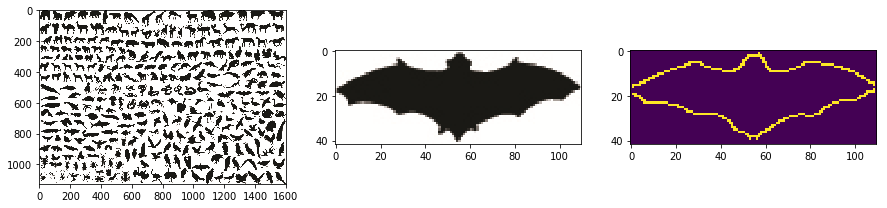

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np
from math import cos, sin, radians, ceil

animals = io.imread('images/animals.png')

xmin = 1271
xmax = 1381
ymin = 519
ymax = 561

bat = animals[ymin:ymax, xmin:xmax]
bat_edge = feature.canny(color.rgb2gray(bat), 2)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(animals)
ax2.imshow(bat)
ax3.imshow(bat_edge)

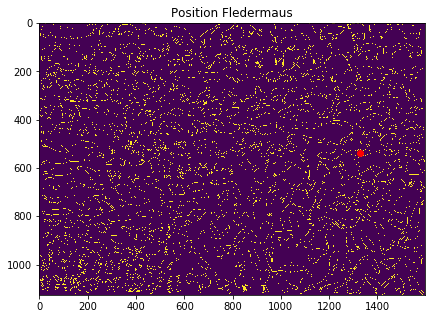

In [7]:
from scipy import ndimage, misc
from collections import defaultdict
import numpy as np
from skimage import io, data, feature, color
from scipy.ndimage.filters import sobel

def get_gradient(image):
    image_gray =color.rgb2gray(image)
    sobel_x_axis = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_y_axis = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    edge = feature.canny(image_gray, 2)
    sx = ndimage.convolve(edge, sobel_x_axis)
    sy = ndimage.convolve(edge, sobel_y_axis)
    gradient = np.arctan2(sy,sx)* 180 / np.pi
    return edge,gradient

def template_origin(template): 
    x0 = 0
    y0 = 0
    i = 0
    for x in range(template.shape[1]):
        for y in range(template.shape[0]): 
            if template[y, x] == True:
                x0 += x
                y0 += y
                i += 1
    xc = ceil(x0/i) 
    yc = ceil(y0/i) 
    return(yc,xc)

def create_r_table(edge, gradient, origin): 
    r_table = defaultdict(list)
    for x in range(edge.shape[1]):
        for y in range(edge.shape[0]): 
            if edge[y, x] == True:
                r = (origin[0] - y, origin[1] - x)
                r_table[gradient[y, x]].append(r) 
    return r_table


def get_accumulator(image, gradient, r_table): 
    accumulator = np.zeros(image.shape) 
    for y in range (image.shape[0]):
        for x in range(image.shape[1]): 
            if image[y,x]:
                for r in r_table[gradient[y,x]]:
                    accum_y, accum_x = y+r[0], x+r[1] 
                    if accum_y < accumulator.shape[0] and accum_x < accumulator.shape[1]:
                        accumulator[accum_y, accum_x] += 1
    return accumulator


edge, gradient = get_gradient(bat)
origin = template_origin(edge)
bat_r_table = create_r_table(edge, gradient, origin)

animals_edges, animals_gradient = get_gradient(animals)
accumulator = get_accumulator(animals_edges, animals_gradient, bat_r_table)

fig = plt.figure(figsize=(20, 15))
plt.title('Position Fledermaus')
plt.imshow(animals_edges)

i,j = np.unravel_index(accumulator.argmax(), accumulator.shape)
plt.scatter([j], [i], marker='o', color='r')
plt.show()

* now implement an extended version of the GHT that find rotated and scaled variants of the template. 
* find Italy (see "italy.jpg") and the map of Europe ("europe_map_political.gif")
* note that you can binarize your italy template by using a simple color lookup
* draw the location of italy on the map and print its scale and orientation (**BONUS**)